# PlayStore Data Analysis

## Himanshu Sharma
## DataScienceOct03 Batch

In [1]:
#import Useful Library
import pandas as pd
import numpy as np

#for making graph
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
df = pd.read_csv( "C:\\Users\\Himanshu Sharma\\Desktop\\Python Assignment\\1\\Playstore Project\\playstore_analysis.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 1. Data clean up – Missing value treatment

#### a.Drop records where rating is missing since rating is our target/study variable

In [3]:
df.info() #check data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [4]:
df = df.dropna(axis=0, subset=['Rating']) #drop where rating is missing

In [5]:
df.shape #check wheather rows are drop or not

(9367, 13)

#### b. Check the null values for the Android Ver column.
 i. Are all 3 records having the same problem?
 ii. Drop the 3rd record i.e. record for “Life Made WIFI …”
 iii. Replace remaining missing values with the mode

In [6]:
# filtering data  
# displaying data only with Android ver = NaN 

Chk_AV_Null = pd.isnull(df["Android Ver"])  
df[Chk_AV_Null]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
#Drop the 3rd record i.e. record for “Life Made WIFI …”
df = df.drop([10472],axis=0)

# filtering data  
# displaying data only with Android ver = NaN

Chk_AV_Null = pd.isnull(df["Android Ver"])    
df[Chk_AV_Null]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [8]:
#Replace remaining missing values with the mode

mode_value_AV = df['Android Ver'].mode()[0]
df['Android Ver']=df['Android Ver'].fillna(mode_value_AV)

In [9]:
df.info() #check information of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null object
Size              9366 non-null float64
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9362 non-null object
Android Ver       9366 non-null object
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


#### c. Current ver – replace with most common value

In [10]:
#Replace remaining missing values with the mode
mode_value_CV=df['Current Ver'].mode()[0]
df['Current Ver']=df['Current Ver'].fillna(mode_value_CV)

In [11]:
df.info() #check information of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null object
Size              9366 non-null float64
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9366 non-null object
Android Ver       9366 non-null object
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


## 2. Data clean up – correcting the data types

#### a. Which all variables need to be brought to numeric types?

In [12]:
'''
Review, Installs, Price

'''

'\nReview, Installs, Price\n\n'

#### b. Price variable – remove $ sign and convert to float

In [13]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', ''))
    return(x)

In [14]:
df['Price'] = df['Price'].apply(clean_currency).astype('float')

#### c.Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [15]:
def clean_installs(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace(',', '').replace('+', ''))
    return(x)

In [16]:
df['Installs'] = df['Installs'].apply(clean_installs).astype('int64')

#### d.Convert all other identified columns to numeric

In [17]:
df['Reviews'] = df['Reviews'].astype('int64') #convert Reviews in int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null int64
Size              9366 non-null float64
Installs          9366 non-null int64
Type              9366 non-null object
Price             9366 non-null float64
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9366 non-null object
Android Ver       9366 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


## 3. Sanity checks – check for the following and handle accordingly

#### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
i. Are there any such records? Drop if so.

In [19]:
result_rating = df.loc[df['Rating'] > 5.0] 
  
print('\nRating more than 5 :\n', result_rating) 


Rating more than 5 :
 Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


####  This prove that we have all the ratings is b/w 1 to 5

#### b. Reviews should not be more than installs as only those who installed can review the app.
i. Are there any such records? Drop if so.

In [20]:
result_reviews = df[df['Reviews'] > df['Installs']] 
  
print('\nReviews is more then Installs :\n', result_reviews.index) 


Reviews is more then Installs :
 Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')


In [21]:
#drop the rows where Reviews are more then Installs
df = df.drop(result_reviews.index,axis=0)

In [22]:
df.shape

(9359, 13)

## 4. Identify and handle outliers

#### a. Price column
i. Make suitable plot to identify outliers in price
ii. Do you expect apps on the play store to cost 200 Check out these cases
iii. After dropping the useless records, make the suitable plot again to identify outliers
iv. Limit data to records with price < 30

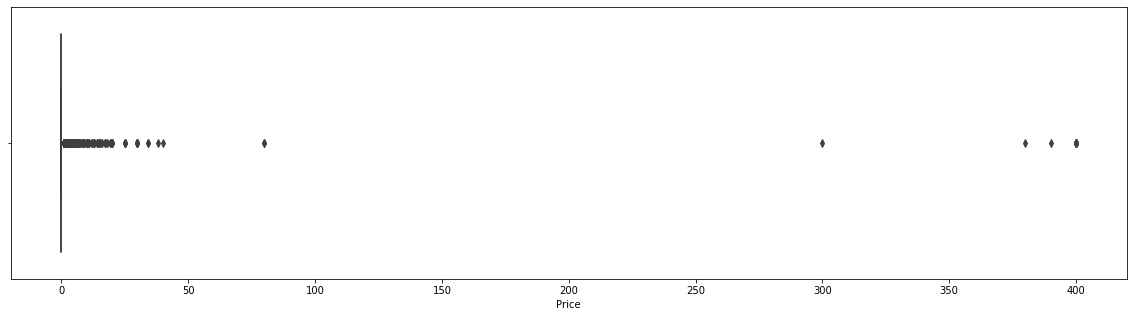

In [23]:
#Make suitable plot to identify outliers in price
plt.figure(figsize=(20,5))
sns.boxplot(df["Price"])

In [24]:
'''
yes, I can expect apps on the play store to cost $200
'''

'\nyes, I can expect apps on the play store to cost $200\n'

In [25]:
#before droping records
df.shape

(9359, 13)

In [26]:
#dropping the useless records
df['Price']= np.where(df['Price']>=50,np.NaN,df['Price'])
df = df.dropna(axis=0, subset=['Price'])

In [27]:
#after droping records
df.shape

(9342, 13)

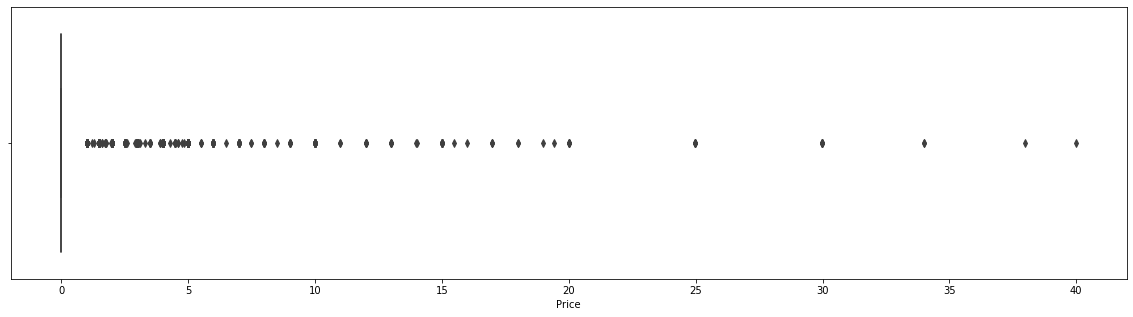

In [28]:
#Make suitable plot again to identify outliers in price
plt.figure(figsize=(20,5))
sns.boxplot(df["Price"])

In [29]:
# Limit data to records with price < $30
df['Price']= np.where(df['Price']>=30,np.NaN,df['Price'])
df = df.dropna(axis=0, subset=['Price'])

In [30]:
df.shape

(9338, 13)

#### b. Reviews column
i. Make suitable plot
ii. Limit data to apps with < 1 Million reviews

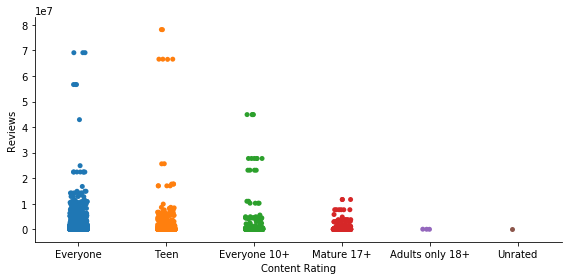

In [31]:
sns.catplot(x="Content Rating", y="Reviews" ,data = df, height=4,aspect=2)

In [32]:
#limit data to apps with< 1 Million Reviews
df['Reviews']= np.where(df['Reviews']>=1000000,np.NaN,df['Reviews'])
df = df.dropna(axis=0, subset=['Reviews'])

In [33]:
df.shape

(8634, 13)

#### c. Installs
i. What is the 95th percentile of the installs?
ii. Drop records having a value more than the 95th percentile

In [34]:
# 95th percentile of the installs

Install_95 = np.percentile(df['Installs'], 95)
print("95th percentile of Installs : ", Install_95) 

95th percentile of Installs :  10000000.0


In [35]:
# Drop records having a value more than the 95th percentile

df['Installs']= np.where(df['Installs']>=Install_95,np.NaN,df['Installs'])
df = df.dropna(axis=0, subset=['Installs'])

In [36]:
df.shape

(7258, 13)

## Data analysis to answer business questions

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
a. How do you explain this?
b. What is the implication of this on your analysis?

Skewness: -1.637605


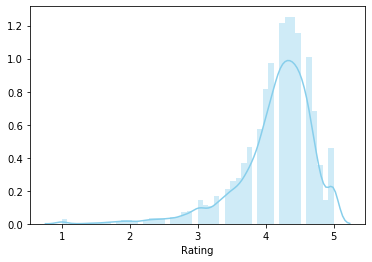

In [37]:
sns.distplot( df['Rating'], color="skyblue")
print("Skewness: %f" % df['Rating'].skew())

In [38]:
'''
AS the Graph shows that the Distribution of Rating skewedness towards higher values.

Skewness: -1.637605 : Negative Skewness - Most frequent values are high and tail is towards low values.

'''

'\nAS the Graph shows that the Distribution of Rating skewedness towards higher values.\n\nSkewness: -1.637605 : Negative Skewness - Most frequent values are high and tail is towards low values.\n\n'

### 6. What are the top Content Rating values?
a. Are there any values with very few records?
b. If yes, drop those as they won’t help in the analysis

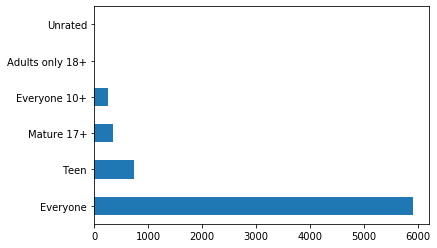

In [39]:
df['Content Rating'].value_counts().head(30).plot(kind='barh')

In [40]:
'''
Unrated and Adults only 18+ have very few records
'''

'\nUnrated and Adults only 18+ have very few records\n'

In [41]:
#drop very few values records

df.drop(df[df['Content Rating'] == 'Unrated'].index, inplace = True)
df.drop(df[df['Content Rating'] == 'Adults only 18+'].index, inplace = True)

In [42]:
df.shape

(7254, 13)

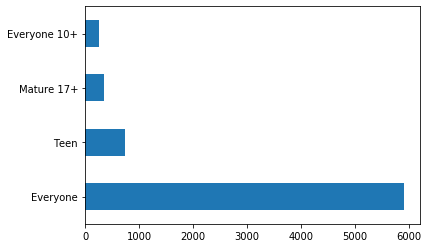

In [43]:
df['Content Rating'].value_counts().head(30).plot(kind='barh')

### 7. Effect of size on rating
a. Make a joinplot to understand the effect of size on rating
b. Do you see any patterns?
c. How do you explain the pattern?

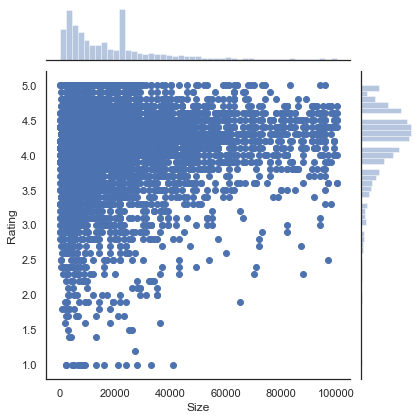

In [44]:
#make jooint plot
sns.set(style="white", color_codes=True)
g = sns.jointplot(x="Size", y="Rating", data=df)

In [45]:
'''

By this graph we can say that size<50000 have more no. of rating then size>5000. 

'''

'\n\nBy this graph we can say that size<50000 have more no. of rating then size>5000. \n\n'

### 8. Look at all the numeric interactions together –
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

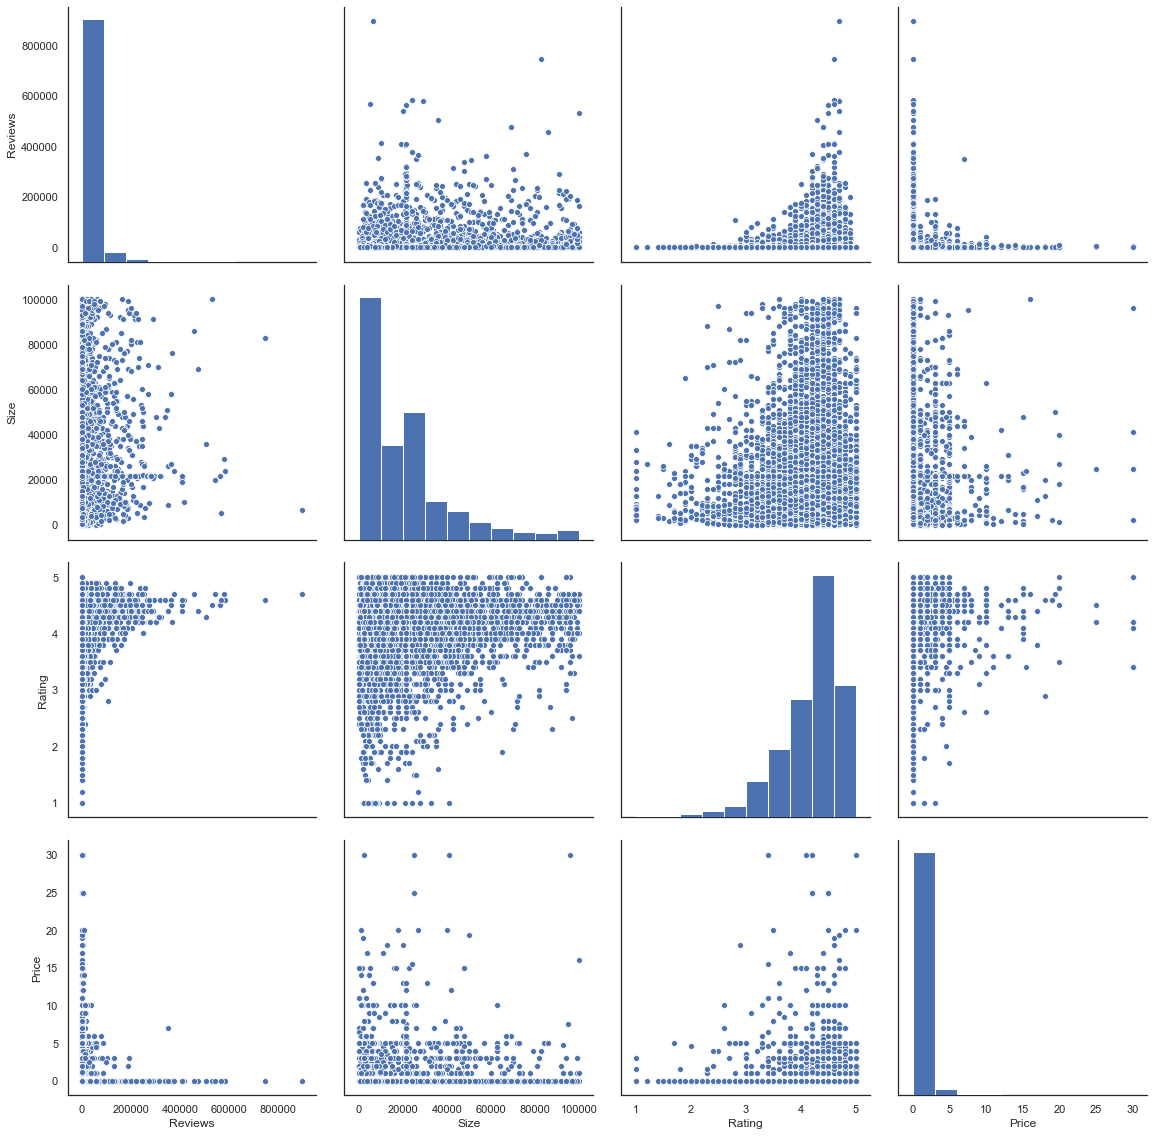

In [46]:
sns.pairplot(df,vars = ['Reviews','Size', 'Rating','Price'], height=4, aspect=1)

### 9. Rating vs. content rating
a. Make a bar plot displaying the rating for each content rating
b. Which metric would you use? Mean? Median? Some other quantile?
c. Choose the right metric and plot

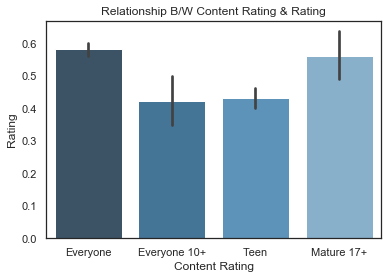

In [47]:
#using Sta. daviation
from numpy import std
plt.title("Relationship B/W Content Rating & Rating")
sns.set(style="whitegrid")
ax = sns.barplot(x="Content Rating", y="Rating", data=df, palette="Blues_d",estimator=std)

## 10. Content rating vs. size vs. rating – 3 variables at a time

#### a. Create 5 buckets (20% records in each) based on Size

#### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

#### c. Make a heatmap of this
i. Annotated
ii. Greens color map

#### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

In [48]:
'''
explanation
'''

'\nexplanation\n'